<a href="https://colab.research.google.com/github/whispermy/novatus_academia/blob/main/Week3_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AI 노바투스과정**

Week 3: 딥러닝 기초 I (2021-08-20)

실습 #2: 신경망 모형 학습하여 MNIST 패션 데이터 분류 문제 및 California Housing Price 데이터의 회귀분석 문제 풀기

## 0. 데이터셋 준비

In [2]:
#keras 라이브러리 가져오기
import tensorflow.keras as  keras

In [3]:
#MNIST 패션 데이터 로딩하기
fashion_mnist = keras.datasets.fashion_mnist
# fashion_mnist = keras.datasets.fashion_mnist.load_data() 
# 위처럼 작성하여도 무방, 변수명과 가독성에 주의 할 것
# training 과 test의 비율은 대부분 8:2 ~ 9:1 정도로 설정한다. but 가장 효과적인건 무작위이고, 아래 코드는 무작위로 되어 있다.
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
# 패션 데이터 탐색하기

# X_train.shape
# X_train[0]
# y_train.shape
# y_train[0]
import numpy as np

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

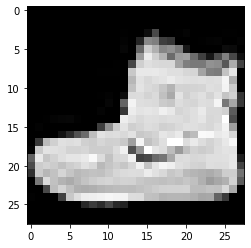

In [5]:
# 28 * 28 차원의 X 를 그림으로 표현하기

import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")


In [6]:
#target 의 각 숫자값에 해당하는 클래스 명 지정하기
class_name = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
len(class_name)

10

In [8]:
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터 (valdiation set) 으로 분리
# 분리와 동시에 정규화 
X_train_full = X_train
y_train_full = y_train

X_train, X_valid = X_train_full[:55000]/255.0, X_train_full[55000:]/255.0
y_train, y_valid = y_train_full[:55000], y_train_full[55000:]

X_test = X_test / 255.0


In [9]:
X_valid.shape

(5000, 28, 28)

## 1. 모형 만들기

In [10]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 2개이며 첫번째 은닉층에 뉴런 300개, 두번째 은닉층에 뉴런 100개 인 골격 만들기
# 활성함수는 relu 사용하기 

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax")) # 다중 라벨의 분류작업이므로 활성함수를 softmax로 사용한다.

In [11]:
# 모형의 골격과 모수 개수 출력하기

model.summary()
# 784 * 300 + 300 = 235500
# 300 * 100 + 100 = 30100
# 100*10 + 10 = 1010

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
# 모수의 초기값 출력하기

hidden1 = model.layers[1]

weightes, biases = hidden1.get_weights()

#weightes
#weightes.shape
#biases
#biases.shape

In [13]:
# 모형 컴파일하기 (손실함수, 최적화 방법 지정하기)
model.compile(loss="sparse_categorical_crossentropy" ,optimizer="sgd" ,metrics=["accuracy"] )


손실함수 종류: https://keras.io/ko/losses/

## 2. 모형 학습하기

In [14]:
X_valid.shape

(5000, 28, 28)

In [15]:
#epoch 개수를 30개로 설정하여 모형 학습하기
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid) )

history = model.fit(x=X_train, y=y_train, epochs=30, validation_data=(X_valid,y_valid))

# history = model.fit(x=X_train, y=y_train, epochs=30, batch_size = 50, validation_data=(X_valid,y_valid))
# batch_size를 지정하지 않으면 default로 32이다. 그래서 55000/32 = 1719가 된다.

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.7093 - accuracy: 0.7654 - val_loss: 0.5866 - val_accuracy: 0.7778
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4846 - accuracy: 0.8309 - val_loss: 0.4349 - val_accuracy: 0.8482
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4414 - accuracy: 0.8461 - val_loss: 0.4372 - val_accuracy: 0.8444
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4128 - accuracy: 0.8558 - val_loss: 0.4109 - val_accuracy: 0.8538
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3936 - accuracy: 0.8631 - val_loss: 0.3926 - val_accuracy: 0.8614
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3763 - accuracy: 0.8681 - val_loss: 0.3861 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3636 - accuracy: 0.8731 - val_loss: 0.3625 - val_accuracy:

## 3. 학습 결과 확인하기

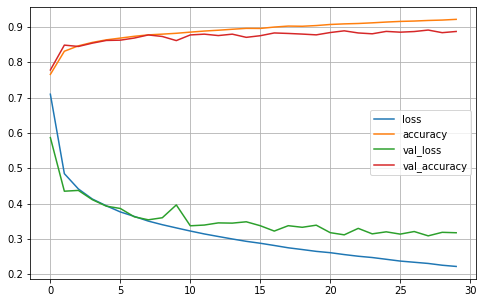

In [16]:
#학습 곡선 그리기
import pandas as pd

pd.DataFrame(history.history).plot(figsize=[8,5])
plt.grid(True)


In [17]:
#학습된 모형으로 새로운 그림이 각 범주에 속할 확률 출력하기
X_new = X_test[:3]
y_proba = model.predict(X_new)
# y_proba.round(2)
# y_proba.max(axis=0) -> 세로 방향에서 max값 표현
# y_proba.max(axis=1) -> 가로 방향에서 max값 표현
y_proba.argmax(axis=1) # -> max값의 인덱스 반환

array([9, 2, 1])

In [18]:
#학습된 모형으로 새로운 그림의 범주 예측하기
# model.predict_classes(X_new)  -> 교재에 나와있지만, keras 내부 라이브러리 변동으로 사용 불능
#y_proba.argmax(axis=1)
#class_name
np.array(class_name)[y_proba.argmax(axis=1)]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

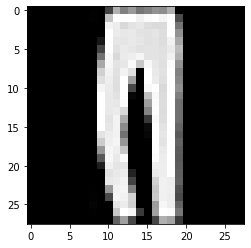

In [19]:
plt.imshow(X_new[2],cmap="gray")

In [20]:
# 실제 범주와 비교해보기
y_test[:3]

array([9, 2, 1], dtype=uint8)

In [21]:
# 테스트용 데이터에서의 정분류율 출력하기
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3311 - accuracy: 0.8854


[0.33108437061309814, 0.8853999972343445]

In [22]:
#학습된 모형 저장하기
model.save("Week3_my_keras_model.h5")

In [23]:
#저장된 모형 로딩하기
loaded_model = keras.models.load_model("Week3_my_keras_model.h5")

## 4. California Housing Price 데이터셋에 신경망 모형 적용하여 회귀분석하기

In [24]:
#데이터셋 로딩, 데이터셋 분리, 데이터 정규화에 필요한 패키지 로딩하기

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [25]:
#데이터셋 로딩하기
housing = fetch_california_housing()

In [26]:
# 데이터를 학습용 데이터와 테스트용 데이터로 나누기
# 학습용 데이터를 다시 학습용 데이터와 검증용 데이터로 나누기
X_train_full2, X_test2, y_train_full2, y_test2  = train_test_split(housing.data, housing.target)
# X_train_full2, X_test2, y_train_full2, y_test2  = train_test_split(housing.data, housing.target, size = 0.8)
# -> size는 변경하고 싶은 수치로 변경 가능하다. 
X_train2, X_vaild2, y_train2, y_vaild2  = train_test_split(X_train_full2, y_train_full2)


In [27]:
# 데이터 정규화 하기
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_vaild2 = scaler.transform(X_vaild2)  # -> fit을 쓰게 된다면 새롭게 fit을 하게 되므로, 같은 scaler를 사용하기 위해 fit을 없앤다.
X_test2 = scaler.transform(X_test2) # 마찬가지

In [28]:
X_train2.shape

(11610, 8)

In [29]:
# keras 의 Sequential API 를 활용하여 신경망 모형의 골격 만들기 
# 은닉층이 1개이며 뉴런이 30개 인 골격 만들기
# 활성함수는 relu 사용하기

# model2 = keras.models.Sequential()
# model2.add(keras.layers.Flatten(input_shape=[8]))
# model2.add(keras.layers.Dense(30, activation="relu"))
# model2.add(keras.layers.Dense(1, activation="relu")) # 예측이므로 함수를 뭘써야하나?
# model2.summary()

model2 = keras.models.Sequential([
  keras.layers.Dense(30, activation="relu", input_shape = X_train2.shape[1:]),
  keras.layers.Dense(1)
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [30]:
#모형 컴파일하기(손실함수, 최적화 방법 지정하기)

# model.compile(loss="sparse_categorical_crossentropy" ,optimizer="sgd" ,metrics=["accuracy"] )

model2.compile(loss="mean_squared_error", optimizer="sgd")

In [31]:
#epoch 개수를 20개로 설정하여 모형 학습하기

# history2 = model2.fit(x=X_train2, y=y_train2, epochs=20, validation_data=(X_valid2,y_valid2))

history2 = model2.fit(X_train2, y_train2, epochs=20, validation_data=(X_vaild2,y_vaild2))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8270 - val_loss: 0.5817
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.0226 - val_loss: 0.7499
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 208.7527 - val_loss: 4.6180
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 2.0683 - val_loss: 1.3099
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8283 - val_loss: 0.6375
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6340 - val_loss: 0.5136
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4802 - val_loss: 0.4890
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4600 - val_loss: 0.4980
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4525 - val_loss: 0.4770
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4594 - val_loss: 0.46

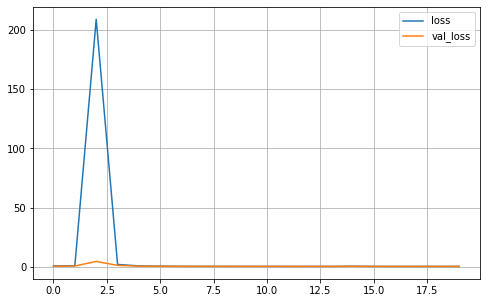

In [32]:
#학습결과 확인하기
# import pandas as pd

# pd.DataFrame(history.history).plot(figsize=[8,5])
# plt.grid(True)

pd.DataFrame(history2.history).plot(figsize=[8,5])
plt.grid(True)

In [33]:
mse_test = model2.evaluate(X_test2, y_test2)

162/162 [==============================] - 0s 860us/step - loss: 0.3735


## 5. **심화** : Functional API 이용하여 복잡한 모형 만들기

### 5.1 예제 1

In [34]:
# keras 의 Functional API 를 활용하여 신경망 모형의 골격 만들기 

input_=keras.layers.Input(shape=X_train.shape[1:])
hidden1=keras.layers.Dense(30, activation="relu")(input_)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_,hidden2])
output=keras.layers.Dense(1)(concat)

model=keras.Model(inputs=[input_], outputs=[output])

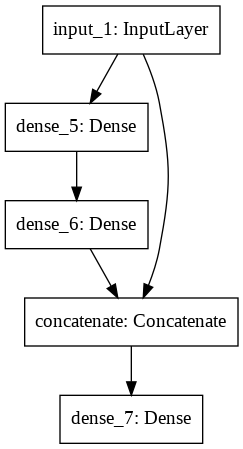

In [36]:
#모형 도식화 하기
keras.utils.plot_model(model)

In [ ]:
#모형 컴파일하기(손실함수, 최적화 방법 지정하기)




In [ ]:
#epoch 개수를 20개로 설정하여 모형 학습하기



### 5.2 예제 2

In [ ]:
# keras 의 Functional API 를 활용하여 신경망 모형의 골격 만들기

input_A= keras.layers.Input(shape=[5], name="wide input")
input_B= keras.layers.Input(shape=[6], name="deep input")
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A, hidden2])
output=keras.layers.Dense(1, name="output")(concat)

model=keras.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
#모형 도식화 하기



In [ ]:
#모형 컴파일하기(손실함수, 최적화 방법 지정하기)




In [ ]:
#epoch 개수를 20개로 설정하여 모형 학습하기



### 5.3 예제 3: 다중 출력값 모형 만들기

In [ ]:
# keras 의 Functional API 를 활용하여 신경망 모형의 골격 만들기

input_A= keras.layers.Input(shape=[5], name="wide input")
input_B= keras.layers.Input(shape=[6], name="deep input")
hidden1=keras.layers.Dense(30, activation="relu")(input_B)
hidden2=keras.layers.Dense(30, activation="relu")(hidden1)
concat=keras.layers.concatenate([input_A, hidden2])
output=keras.layers.Dense(1, name="output")(concat)

aux_output=keras.layers.Dense(1, name="aux_output")(hidden2)

model=keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [ ]:
#모형 도식화 하기


In [ ]:
#모형 컴파일하기(손실함수, 최적화 방법 지정하기)



In [ ]:
#epoch 개수를 20개로 설정하여 모형 학습하기



In [ ]:
#학습 결과 확인하기 

